In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\SUNIL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [8]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [12]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [14]:
print('Variance of original Age:', X_train['Age'].var())
print('Variance of Age after 99 Imputation:', X_train['Age_99'].var())
print('Variance of Age after -1 Imputation:', X_train['Age_minus1'].var())
print('\nVariance of original Fare:', X_train['Fare'].var())
print('Variance of Fare after 99 Imputation:', X_train['Fare_99'].var())
print('Variance of Fare after -1 Imputation:', X_train['Fare_minus1'].var())

Variance of original Age: 210.2517072477435
Variance of Age after 99 Imputation: 932.9665366701432
Variance of Age after -1 Imputation: 315.9955036260055

Variance of original Fare: 2761.0314349486343
Variance of Fare after 99 Imputation: 2833.708690936761
Variance of Fare after -1 Imputation: 2675.2394049177024


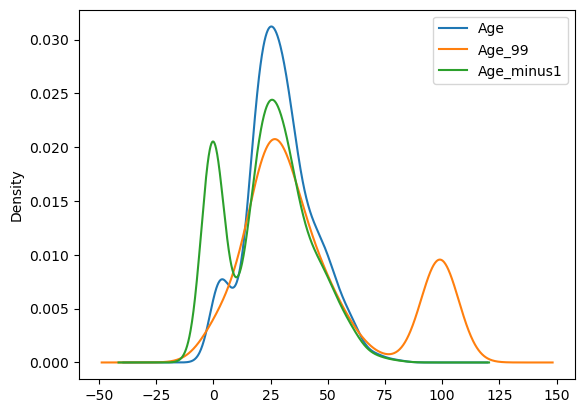

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# After 99 imputation
X_train['Age_99'].plot(kind='kde', ax=ax)

# After -1 imputation
X_train['Age_minus1'].plot(kind='kde', ax=ax)

plt.legend()
plt.show()

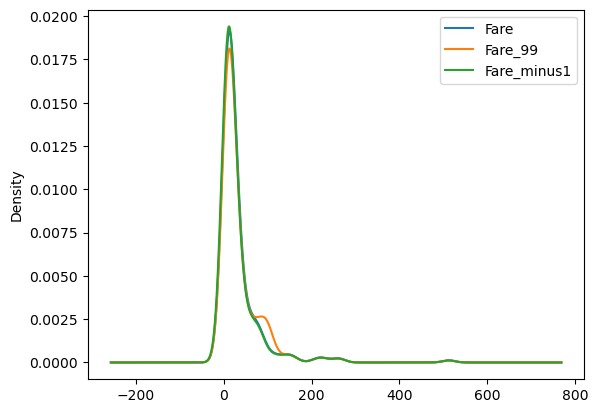

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# After 99 imputation
X_train['Fare_99'].plot(kind='kde', ax=ax)

# After - imputation
X_train['Fare_minus1'].plot(kind='kde', ax=ax)

plt.legend()
plt.show()

In [17]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,75.273024,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,17.603852,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-116.528480,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,138.114503,124.270305
Fare_99,75.273024,2761.031435,17.603852,-116.528480,138.114503,2833.708691,2514.109946
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,2514.109946,2675.239405


In [18]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.091016,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.196548,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.071667,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.145956,0.135159
Fare_99,0.091016,1.000000,0.196548,-0.071667,0.145956,1.000000,0.913115
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.913115,1.000000


<Axes: >

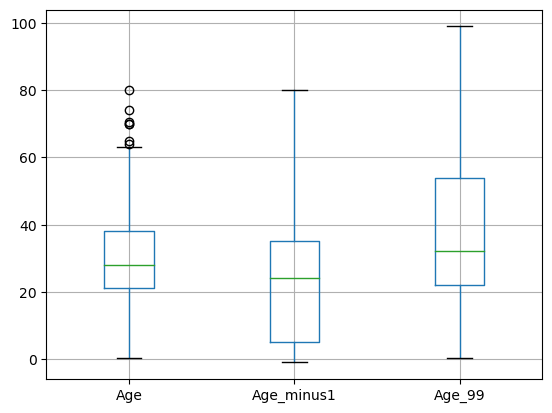

In [20]:
X_train[['Age', 'Age_minus1', 'Age_99']].boxplot()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
imputer_99 = SimpleImputer(strategy='constant', fill_value=99)
imputer_minus1 = SimpleImputer(strategy='constant', fill_value=-1)

In [23]:
trf = ColumnTransformer([
    ('imputer_99', imputer_99, ['Age']),
    ('imputer_minus1', imputer_minus1, ['Fare'])
], remainder='passthrough')

In [24]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_99',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer_minus1',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [27]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [28]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  -1.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])